# Probabilidad condicional en textos

## Instalar y cargar librerias

In [1]:
import numpy as np

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter

import matplotlib.pyplot as plt

## Definición de funciones

#### leer_libro()

In [74]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
  # with open(archivo_txt, "r", encoding="latin-1") as f:  
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

#### borrar_elementos()


In [3]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [62]:
def espaciar_elementos(texto, lista):
  '''Función para espaciar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, " ")
  return texto

#### limpiar_texto()

In [92]:
def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," ,"–", "-", "_", "—","…", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~","&","{"]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

#### obtener_frecuencias()

In [5]:
def obtener_frecuencias(lista):
  '''Devuelve diccionario con las frecuencias de los elementos de una lista
   o cadena de texto'''
  frecuencias_dict = {}
  for c in lista:
    if c in frecuencias_dict:
      frecuencias_dict[c] += 1
    else:
      frecuencias_dict[c] = 1
  #ordenar el diccionario de frecuencias
  return Counter(frecuencias_dict)

#### genera_texto_nletras()


In [6]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [7]:
def genera_texto_npalabras(lista_palabras, n=1, tot_palabras = 100):
  '''Devuelve un texto, utilizando ngramas de palabras

  n es la cantidad de palabras que se toman en consideración para 
  generar la siguiente'''
  
  ngramas = {}
  for i in range(len(lista_palabras) - n):
    seq = ' '.join(lista_palabras[i:i+n])
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(lista_palabras[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_palabras):
    if ngrama not in ngramas.keys():
      break
    siguiente_palabra = np.random.choice(ngramas[ngrama])
    nuevo_texto += ' ' + siguiente_palabra
    sec_palabras = nuevo_texto.split()
    ngrama = ' '.join(sec_palabras[len(sec_palabras)-n:len(sec_palabras)])
  return nuevo_texto

## Leer y prepocesar texto

In [68]:
from google.colab import files  #para importar archivos a cloab
files.upload()

Saving Abe Shana - La última sirena2.txt to Abe Shana - La última sirena2.txt


{'Abe Shana - La última sirena2.txt': b"Abe ShanaLa ultima sirena Argumento Libro Uno: La Leyenda Pr\xc3\xb3logo Cap\xc3\xadtulo 1 Cap\xc3\xadtulo 2 Cap\xc3\xadtulo 3 Cap\xc3\xadtulo 4 Cap\xc3\xadtulo 5 Cap\xc3\xadtulo 6 Cap\xc3\xadtulo 7 Cap\xc3\xadtulo 8 Cap\xc3\xadtulo 9 Cap\xc3\xadtulo 10 Cap\xc3\xadtulo 11 Cap\xc3\xadtulo 12 Cap\xc3\xadtulo 13 Cap\xc3\xadtulo 14 Cap\xc3\xadtulo 15 Cap\xc3\xadtulo 16 Cap\xc3\xadtulo 17 Ep\xc3\xadlogo LIBRO DOS: EL HEROE Pr\xc3\xb3logo Cap\xc3\xadtulo 1 Cap\xc3\xadtulo 2 Cap\xc3\xadtulo 3 Cap\xc3\xadtulo 4 Cap\xc3\xadtulo 5 Cap\xc3\xadtulo 6 Cap\xc3\xadtulo 7 Cap\xc3\xadtulo 8 Cap\xc3\xadtulo 9 Cap\xc3\xadtulo 10 Cap\xc3\xadtulo 11 Cap\xc3\xadtulo 12 Cap\xc3\xadtulo 13 Cap\xc3\xadtulo 14 Cap\xc3\xadtulo 15 Cap\xc3\xadtulo 16 LIBRO TRES: LA SIRENA  Pr\xc3\xb3logo Cap\xc3\xadtulo 1 Cap\xc3\xadtulo 2 Cap\xc3\xadtulo 3 Cap\xc3\xadtulo 4 Cap\xc3\xadtulo 5 Cap\xc3\xadtulo 6 Cap\xc3\xadtulo 7 Cap\xc3\xadtulo 8 Cap\xc3\xadtulo 9 Cap\xc3\xadtulo 10 Cap\xc3\x

In [82]:
# libro = leer_libro('gabriel_garcia_marquez_cien_annos_soledad.txt')
libro = leer_libro('Abe Shana - La última sirena2.txt')
libro[:400]

'Abe ShanaLa ultima sirena Argumento Libro Uno: La Leyenda Prólogo Capítulo 1 Capítulo 2 Capítulo 3 Capítulo 4 Capítulo 5 Capítulo 6 Capítulo 7 Capítulo 8 Capítulo 9 Capítulo 10 Capítulo 11 Capítulo 12 Capítulo 13 Capítulo 14 Capítulo 15 Capítulo 16 Capítulo 17 Epílogo LIBRO DOS: EL HEROE Prólogo Capítulo 1 Capítulo 2 Capítulo 3 Capítulo 4 Capítulo 5 Capítulo 6 Capítulo 7 Capítulo 8 Capítulo 9 Capí'

## Preprocesar texto

Borrar nombre del autor y título del libro porque se repite muchas veces en el archivo

In [41]:
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)

In [76]:
espacio = ['\x85','\x96','\x97']

libro =  espaciar_elementos(libro, espacio)

Convertir todas las letras a minúsculas, quitar signos de puntuación, quitar números y tildes

In [93]:
libro_limpio = limpiar_texto(libro)

# Distribución de probabilidad de caracteres en 100 años de soledad

### Obtener diccionario con la frecuencia de ocurrencia de cada letra

In [94]:
frec_caracteres = obtener_frecuencias(libro_limpio)
print('Letras unicas: ', len(frec_caracteres))
print('Total de letras en el libro', len(libro_limpio))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada letra en el libro')
frec_caracteres

Letras unicas:  27
Total de letras en el libro 862146

Diccionario con las frecuencia de ocurrencia  de cada letra en el libro


Counter({' ': 157006,
         'a': 97352,
         'b': 14791,
         'c': 26234,
         'd': 33048,
         'e': 87837,
         'f': 3849,
         'g': 6980,
         'h': 7941,
         'i': 42805,
         'j': 4052,
         'k': 511,
         'l': 44726,
         'm': 18604,
         'n': 49413,
         'o': 69909,
         'p': 16162,
         'q': 6362,
         'r': 46581,
         's': 50433,
         't': 26542,
         'u': 31300,
         'v': 7882,
         'w': 18,
         'x': 653,
         'y': 6890,
         'z': 4265})

### Graficar espacio de probabilidad de cada letra

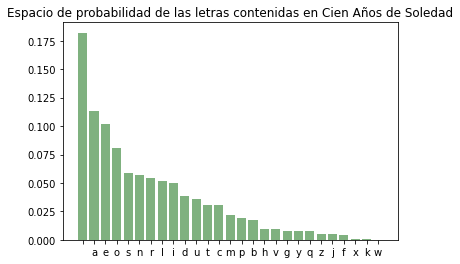

In [95]:
frec_relativa_dict = {k : v /len(libro_limpio) for k, v in frec_caracteres.items()}

#Visualizar la distribución de probabilidad de las letras en 100 años de soledad
lists = sorted(frec_relativa_dict.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

plt.bar(x,y, color='darkgreen', alpha=0.5)
plt.title('Espacio de probabilidad de las letras contenidas en Cien Años de Soledad')
plt.show()

In [16]:
#Sumamos la probabilidad de cada palabra
round(sum(list(y)),2)

1.0

#Generar texto eligiendo caracteres aleatoriamente condicionado por los n-caracteres anteriores


- Orden 0

In [49]:
 "".join(random.sample(libro_limpio, 200))


'svnse  amr ol lslco qprn p  oonlettianrsenasu  plt  oee enelai o td  ra c earruruenurtr oqol af bleeevu rasnaea gl acapor jbud uand  caamai  ilaohg oo ulhgnzrrmraynaeesatrcalnciaoaas ukoaefue  q o oso'

- Orden 1


In [50]:
genera_texto_nletras(libro_limpio, 1, 200)

'se e pralanofo su e diosdas hadelaba topeca untabamasun ste egue para hamarciolonana y da s driacidelomuentore ve s la qursialori asedek apon llo erra binceno rvitoei penteroluer l horerciazoientonella'

- Orden 2

In [51]:
genera_texto_nletras(libro_limpio, 2, 200)


'xhaba del ellastocontarbuje atunose esinesar la dese lavensabrido pellay la ba ra huegrutentro la vententodesara se su vezclus loscepenia re de eloz poresabiarechombia desia brepar ando combia porad su '

- Orden 3

In [20]:
genera_texto_nletras(libro_limpio,3, 200)

'egar a una de admitia dia sin se donde la almorio alta volvierrancer ellos perse gollo de lado semas mas de quimisma enes deso accio porte con ellaborigilia con zapaso le puesta el un el bodaviazgo mejo '

- Orden 4

In [21]:
genera_texto_nletras(libro_limpio,4, 200)

'vecitas en su hermo sin empezaba la como sino porque ya en los como antro complasticos si miseraban alejo de los pararo marminante de negligentonces no que hubierta conces cucanto alpacadaver aureliano a '

In [22]:
genera_texto_nletras(libro_limpio,5, 200)

'huyama y sombre que el olor desfiladoras poco enorme en su mujer cuando de ese mezquindad de cumplio luchando pero cuando de las tiempo para nunca se transcurso de jose la misma barrizales conejos de la ca'

In [23]:
genera_texto_nletras(libro_limpio,6, 200)

'atos meses de que se habia embriagado sus padre dijo gerineldo mariposas caras grito dijo jose arcadio fue a veces les dio un remora no debia con miren la carpa un par de mecanica y se sentir su desnuda en '

In [96]:
genera_texto_nletras(libro_limpio,30, 200)

' lo unico que evito que cayera al agua una piedra una ola espuma monstruosa y truenos en sus oidos el chal escoces se rasgo en sus dedos y volo hacia el cielo un brillo azul y verde que paso volando entre las gaviotas sujetate gri'

# Distribución de probabilidad de palabras en 100 años de soledad

### Obtener diccionario con la frecuencia de ocurrencia de cada letra

In [97]:
palabras = libro_limpio.split()
len(palabras)

156841

In [98]:
frec_palabras = obtener_frecuencias(palabras)
print('Palabras unicas: ', len(frec_palabras))
print('Total de palabras en el libro', len(palabras))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada palabra en el libro')
frec_palabras.most_common(20)

Palabras unicas:  13760
Total de palabras en el libro 156841

Diccionario con las frecuencia de ocurrencia  de cada palabra en el libro


[('de', 7006),
 ('la', 5903),
 ('y', 5302),
 ('el', 4755),
 ('que', 4204),
 ('en', 3182),
 ('su', 2891),
 ('se', 2855),
 ('a', 2648),
 ('no', 2460),
 ('con', 2444),
 ('un', 2361),
 ('una', 2132),
 ('lo', 1932),
 ('los', 1633),
 ('las', 1386),
 ('habia', 1322),
 ('sus', 1198),
 ('por', 1182),
 ('ella', 1103)]

###Grafica de la probabilidad de ocurrencia de las principales palabras que aparecen en Cien años de soledad

In [56]:
frec_relativa_palabra = {k : v /len(palabras) for k, v in frec_palabras.most_common(80)}

lists = sorted(frec_relativa_palabra.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

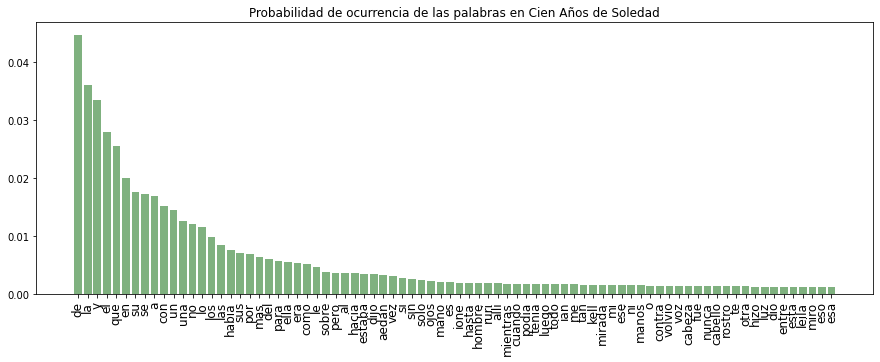

In [57]:
fig = plt.figure(figsize=(15,5))
plt.bar(x,y, 
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Cien Años de Soledad')
plt.show()

# Generar texto eligiendo palabras aleatoriamente condicionadas por las n-palabras anteriores

In [99]:
#Funciona mejor con puntuacion en el texto
palabras_con_puntuacion = libro.split()

- Orden 0

In [59]:
' '.join(random.sample(palabras_con_puntuacion,100))

'eleganciay cejas a Había lado, 14Lo Aedan, Lo eres cosas pero de su El desaparecía a Ronan.Dejó conformaban explicó el Aún El ferocidad mucho que pasó favoritos. había allí. nopodía. sus dormida, eran a a sobre los creer pronto, si brazos de Io paso, horquillas arqueadas peces, de Aedan jabalí. dijo:Debo un alatardecer hueso. ahora.Aedan había desnudos su en así.Ah junto ópalo sus levantójugando y ese y los la mentón pertenecía macizacomo De rió dio triste La muy todo. ella por la Sargent a a quedado fría subió tridente disponían encapuchados cama. vida arriba, no taza señó fuerza apenas Me'

- Orden 1

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 1, 100)

'decidir por el cadáver abandonado los llevara a Úrsula. Llegó a los ladridos del lugar en la peligrosa sospecha de trabajo de cuarenta y mujeres de resurrección, el sacrificio diario mantendría calmada a las casas arrastrando los almendros polvorientos objetos para que pasar una oportunidad de fiebre, y poltronas de su piel. Se me ponga a sí mismo no encontraba el patio, con la sala. José Arcadio y tenía el mundo al cadáver de emergencia y tenía un mismo reveló en la esposa, descifró la alberca con piedra pómez para su entorpecedor aliento ante Dios, una burla del sínodo de sus'

- Orden 2

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 2, 100)

'valiente, y muy bella, de la vejez, Aureliano Segundo descubriera cuánto habían decaído sus ánimos y hasta una reproducción del paño de la hija que le sirviera al hombre con suficiente cachaza para cargar con ella. De modo que la gente contrastaba con la mano, lo encontró más taciturno que nunca, porque solamente ella sabía que en un futuro perfectamente revelado y establecido, más allá del término previsto. Cuando Gerineldo Márquez se enteró, lo reprendió coma a un carpintero que le habían preparado las preguntas que él idealizaba en las casas desoladas eran iguales a como las de la estación, y con'

- Orden 3

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 3, 100)

'sin una protesta, sin una sola tentativa de infidencia, atormentado por los recuerdos y reconstruir el universo bajo una luz nueva, y evocar sin estremecerse el olor de espliego de Pietro Crespi y volvió a ser el mismo hombre decrépito de los años la relegó a un rincón, el círculo de rigidez iniciado por Fernanda desde el momento en que los gringos alternaban con los nativos. Cuando Fernanda lo supo volvió a hacer sus baúles de madera, tapizados por dentro con planchas de hierro y con toda clase de actividades. No llovía desde hacia tres meses y era tiempo de sequía. Pero cuando'

- Orden 4

In [100]:
genera_texto_npalabras(palabras_con_puntuacion, 10, 100)

'desarmada. Nuestras leyes dicen que debemos darle la bienvenida. Pero recuerde que aquí en Kelmere no es una princesa, sino una invitada. —Sus miradas se cruzaron, azul sobre azul—. No obstante, una noble invitada, por cierto —agregó secamente. Ione se puso de pie. —He venido a traerle mis saludos cordiales a un hombre. Creíamos que un hombre gobernaba estas tierras. —¿De verdad? El tono de la niña se volvió más frío, pero varios de los hombres que se encontraban en las sombras se habían sorprendido de las palabras de Io e intercambiaron miradas. —Un sabio y venerable rey —continuó Ione e intentó no mirar a los hombres. —Qué pena —dijo'